In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from collections import Counter
from scipy.stats import poisson
from scipy.stats import bernoulli
from scipy.stats import binom
rng = np.random.default_rng()

In [19]:
## Defino parámetros k, p y mu

k = 10
p = 0.7
mu = 10

## Simulo distribuciones de Poisson y Bernoulli via MonteCarlo (1000 veces)

frecuencia_p, frecuencia_Z = [], []

for i in range(1000):
    tiradas_p = rng.integers(1, high=mu, size=100, endpoint=True)
    cuentas = Counter(tiradas_p)
    num_uno_1 = cuentas[1]
    frecuencia_p.append(num_uno_1)

    for i in range(0,k):
        r = bernoulli.rvs(p, size=k)
        frecuencia_Z.append(sum(r))

## Construyo los histogramas        

bin = np.arange(0,25,1)
hist_p, bins_p = np.histogram(frecuencia_p, bins = bin)
hist_Z, bins_Z = np.histogram(frecuencia_Z, bins = bin)   

## Simulo distribuciones de Poisson y Binomiales via paquetes Scipy

# Poisson
kmin = poisson.ppf(0.01, mu)
kmax = poisson.ppf(0.99, mu)
k_p = np.arange(kmin-3, kmax+4)

# Binomial
n = k
kmin = binom.ppf(0.01, n, p)
kmax = binom.ppf(0.99, n, p)
k_b = np.arange(kmin, kmax+2)
rv = binom(n, p)

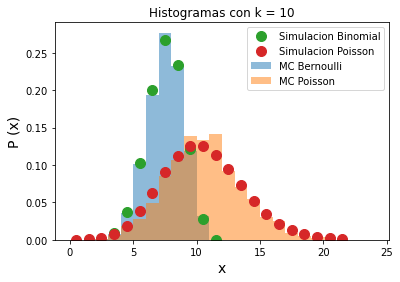

In [20]:
## Grafico histogramas y distribuciones

plt.hist(frecuencia_Z, bins_Z, alpha=0.5, density = True, label = 'MC Bernoulli')
plt.hist(frecuencia_p, bins_p, alpha=0.5, density = True, label = 'MC Poisson')
plt.plot(k_b+0.5, binom.pmf(k_b, n, p), 'o', markersize = 10, label = 'Simulacion Binomial')
plt.plot(k_p+0.5, poisson.pmf(k_p, mu), 'o', markersize = 10, label = 'Simulacion Poisson')
plt.xlabel('x', fontsize = 14)
plt.ylabel('P (x)', fontsize = 14)
plt.legend(loc = 'best')
plt.title('Histogramas con k = {}'.format(k))
# plt.savefig('Ejercicio 10.png')
plt.show()

La suma de n variables iid de Brenouilli sigue una distribución Binomial, y a su vez esta se puede aproximar como una distribución de Poisson pero sólo bajo la aproximación de eventos raros. Esto quiere decir bajo la suposición de baja probabilidad (p < 0.05) y alto n. En los cálculos realizados k = 10 y p = 0.7, por lo que la distribución de Poisson no es adecuada. 

Repito abajo los cálculos pero esta vez con k = 200 y p = 0.05, de forma que Poisson sea buena aproximación y que n*p = mu

In [21]:
## Defino parámetros k, p y mu

k = 200
p = 0.05
mu = 10

## Simulo distribuciones de Poisson y Bernoulli via MonteCarlo (1000 veces)

frecuencia_p, frecuencia_Z = [], []

for i in range(1000):
    tiradas_p = rng.integers(1, high=mu, size=100, endpoint=True)
    cuentas = Counter(tiradas_p)
    num_uno_1 = cuentas[1]
    frecuencia_p.append(num_uno_1)

    for i in range(0,k):
        r = bernoulli.rvs(p, size=k)
        frecuencia_Z.append(sum(r))

## Construyo los histogramas        

bin = np.arange(0,25,1)
hist_p, bins_p = np.histogram(frecuencia_p, bins = bin)
hist_Z, bins_Z = np.histogram(frecuencia_Z, bins = bin)   

## Simulo distribuciones de Poisson y Binomiales via paquetes Scipy

# Poisson
kmin = poisson.ppf(0.01, mu)
kmax = poisson.ppf(0.99, mu)
k_p = np.arange(kmin-3, kmax+4)

# Binomial
n = k
kmin = binom.ppf(0.01, n, p)
kmax = binom.ppf(0.99, n, p)
k_b = np.arange(kmin, kmax+2)
rv = binom(n, p)

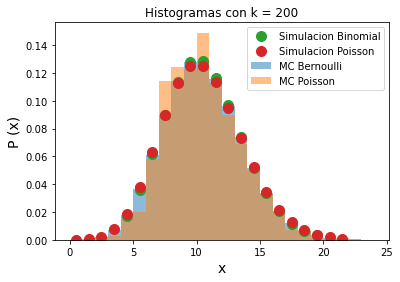

In [22]:
## Grafico histogramas y distribuciones

plt.hist(frecuencia_Z, bins_Z, alpha=0.5, density = True, label = 'MC Bernoulli')
plt.hist(frecuencia_p, bins_p, alpha=0.5, density = True, label = 'MC Poisson')
plt.plot(k_b+0.5, binom.pmf(k_b, n, p), 'o', markersize = 10, label = 'Simulacion Binomial')
plt.plot(k_p+0.5, poisson.pmf(k_p, mu), 'o', markersize = 10, label = 'Simulacion Poisson')
plt.xlabel('x', fontsize = 14)
plt.ylabel('P (x)', fontsize = 14)
plt.legend(loc = 'best')
plt.title('Histogramas con k = {}'.format(k))
# plt.savefig('Ejercicio 10.png')
plt.show()

En este caso podemos ver claramente que la distribución de Poisson es una buena aproximación a la distribución Binomial.